<a href="https://colab.research.google.com/github/SisekoC/My-Notebooks/blob/main/Stochastic_grad_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification using Stochastic Gradient Descent
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

In this notebook, we show the application of Stochastic Gradient Descent for classification problems. **This is particularly useful compared to some other popular classifiers like Random Forest as the training dataset and feature vector size scale up**.

We make use of the `SGDClassifier` estimator class from Scikit-learn. Read about it here,
<br>https://scikit-learn.org/stable/modules/sgd.html

### A bit of theory
Stochastic gradient descent (SGD) is an optimization method for unconstrained optimization problems. In contrast to (batch) gradient descent, **SGD approximates the true gradient of  by considering a single training example at a time**. This provides the advantage of speed at the cost of some amount of randomness in the solution trajectory.

The class `SGDClassifier` (or `SGDRegressor`) implements a first-order SGD learning routine. The algorithm iterates over the training examples and for each example updates the model parameters according to the update rule given by

$$w\leftarrow w-\eta\left (\alpha \frac{\partial R(w)}{\partial w}+\frac{\partial L(w^Tx_i+b,y_i)}{\partial w} \right )$$

where $\eta$ is the learning rate which controls the step-size in the parameter space, $x_i$,$y_i$ are the instances of feature and response, respectively, $R(w)$ is the penalty function and $\alpha$ is the coefficient of the penalty/regularization term. The intercept $b$ is updated similarly but without regularization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from time import time
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Train using various classifiers with increasing training set size

- Create a synthetic dataset (i.e. classification problem) using `make_classification` function
- Standardize the feature set using `StandardScaler`
- Test/train split
- Fit with the training set
- Predict and compute accuracy score with the test set

### `SGDClassifier`: Using `hinge` loss (support vector machine loss)

In [2]:
sgd_class = SGDClassifier(alpha=0.001,loss='hinge',max_iter=100,tol=0.001,n_jobs=-1,early_stopping=True,n_iter_no_change=2)
hinge_acc=[]
hinge_time=[]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for size in [int(10**(0.2*i)) for i in range(15,31)]:
    prob=make_classification(n_samples=size,n_features=50, n_informative=45,n_classes=2,class_sep=0.75,random_state=101)
    X,y=prob
    X = scaler.fit_transform(X)
    print("Size of the problem: ",X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    t1 = time()
    sgd_class.fit(X_train,y_train)
    t2 = time()
    t_delta=round(1e3*(t2-t1),3)
    hinge_time.append(t_delta)
    print(f"Took {t_delta} milliseconds")
    acc = accuracy_score(y_test,sgd_class.predict(X_test))
    hinge_acc.append(acc)
    print("Accuracy on the test set:", round(acc,3))
    print()

Size of the problem:  (1000, 50)
Took 42.0 milliseconds
Accuracy on the test set: 0.77

Size of the problem:  (1584, 50)
Took 39.33 milliseconds
Accuracy on the test set: 0.693

Size of the problem:  (2511, 50)
Took 57.59 milliseconds
Accuracy on the test set: 0.753

Size of the problem:  (3981, 50)
Took 54.728 milliseconds
Accuracy on the test set: 0.717

Size of the problem:  (6309, 50)
Took 99.177 milliseconds
Accuracy on the test set: 0.758

Size of the problem:  (10000, 50)
Took 75.662 milliseconds
Accuracy on the test set: 0.762

Size of the problem:  (15848, 50)
Took 69.384 milliseconds
Accuracy on the test set: 0.789

Size of the problem:  (25118, 50)
Took 229.198 milliseconds
Accuracy on the test set: 0.786

Size of the problem:  (39810, 50)
Took 150.326 milliseconds
Accuracy on the test set: 0.814

Size of the problem:  (63095, 50)
Took 301.364 milliseconds
Accuracy on the test set: 0.786

Size of the problem:  (100000, 50)
Took 331.722 milliseconds
Accuracy on the test set: 

### `SGDClassifier`: Using `log` loss (logistic regression)

In [3]:
sgd_class = SGDClassifier(alpha=0.001,loss='hinge',max_iter=100,tol=0.001,n_jobs=-1,early_stopping=True,n_iter_no_change=2)
log_acc=[]
log_time=[]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for size in [int(10**(0.2*i)) for i in range(15,31)]:
    prob=make_classification(n_samples=size,n_features=50, n_informative=45,n_classes=2,class_sep=0.75,random_state=101)
    X,y=prob
    X = scaler.fit_transform(X)
    print("Size of the problem: ",X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    t1 = time()
    sgd_class.fit(X_train,y_train)
    t2 = time()
    t_delta=round(1e3*(t2-t1),3)
    log_time.append(t_delta)
    print(f"Took {t_delta} milliseconds")
    acc = accuracy_score(y_test,sgd_class.predict(X_test))
    log_acc.append(acc)
    print("Accuracy on the test set:", round(acc,3))
    print()

Size of the problem:  (1000, 50)
Took 13.947 milliseconds
Accuracy on the test set: 0.753

Size of the problem:  (1584, 50)
Took 14.601 milliseconds
Accuracy on the test set: 0.746

Size of the problem:  (2511, 50)
Took 16.019 milliseconds
Accuracy on the test set: 0.727

Size of the problem:  (3981, 50)
Took 107.774 milliseconds
Accuracy on the test set: 0.709

Size of the problem:  (6309, 50)
Took 30.972 milliseconds
Accuracy on the test set: 0.757

Size of the problem:  (10000, 50)
Took 85.834 milliseconds
Accuracy on the test set: 0.774

Size of the problem:  (15848, 50)
Took 193.292 milliseconds
Accuracy on the test set: 0.794

Size of the problem:  (25118, 50)
Took 223.519 milliseconds
Accuracy on the test set: 0.786

Size of the problem:  (39810, 50)
Took 471.971 milliseconds
Accuracy on the test set: 0.812

Size of the problem:  (63095, 50)
Took 533.033 milliseconds
Accuracy on the test set: 0.783

Size of the problem:  (100000, 50)
Took 253.166 milliseconds
Accuracy on the tes

### `SGDClassifier`: Using `perceptron` loss/algorithm

In [4]:
sgd_class = SGDClassifier(alpha=0.001,loss='hinge',max_iter=100,tol=0.001,n_jobs=-1,early_stopping=True,n_iter_no_change=2)
perceptron_acc=[]
perceptron_time=[]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for size in [int(10**(0.2*i)) for i in range(15,31)]:
    prob=make_classification(n_samples=size,n_features=50, n_informative=45,n_classes=2,class_sep=0.75,random_state=101)
    X,y=prob
    X = scaler.fit_transform(X)
    print("Size of the problem: ",X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    t1 = time()
    sgd_class.fit(X_train,y_train)
    t2 = time()
    t_delta=round(1e3*(t2-t1),3)
    perceptron_time.append(t_delta)
    print(f"Took {t_delta} milliseconds")
    acc = accuracy_score(y_test,sgd_class.predict(X_test))
    perceptron_acc.append(acc)
    print("Accuracy on the test set:", round(acc,3))
    print()

Size of the problem:  (1000, 50)
Took 7.162 milliseconds
Accuracy on the test set: 0.76

Size of the problem:  (1584, 50)
Took 7.082 milliseconds
Accuracy on the test set: 0.702

Size of the problem:  (2511, 50)
Took 8.377 milliseconds
Accuracy on the test set: 0.72

Size of the problem:  (3981, 50)
Took 14.728 milliseconds
Accuracy on the test set: 0.668

Size of the problem:  (6309, 50)
Took 31.094 milliseconds
Accuracy on the test set: 0.734

Size of the problem:  (10000, 50)
Took 30.573 milliseconds
Accuracy on the test set: 0.753

Size of the problem:  (15848, 50)
Took 27.345 milliseconds
Accuracy on the test set: 0.774

Size of the problem:  (25118, 50)
Took 96.328 milliseconds
Accuracy on the test set: 0.79

Size of the problem:  (39810, 50)
Took 99.796 milliseconds
Accuracy on the test set: 0.807

Size of the problem:  (63095, 50)
Took 120.369 milliseconds
Accuracy on the test set: 0.783

Size of the problem:  (100000, 50)
Took 188.013 milliseconds
Accuracy on the test set: 0.8

### Random Forest classifier
We set the number of decision trees (`n_estimators`) to 20 and `max_depth` to 5, to keep the individual trees simple and shallow. Please feel free to experiment with these values to see if that improves the computation efficiency.

In [5]:
rf = RandomForestClassifier(n_estimators=20,max_depth=5,min_samples_leaf=5,min_samples_split=10,n_jobs=-1)
rf_acc=[]
rf_time=[]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for size in [int(10**(0.2*i)) for i in range(15,31)]:
    prob=make_classification(n_samples=size,n_features=50, n_informative=45,n_classes=2,class_sep=0.75,random_state=101)
    X,y=prob
    X = scaler.fit_transform(X)
    print("Size of the problem: ",X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    t1 = time()
    rf.fit(X_train,y_train)
    t2 = time()
    t_delta=round(1e3*(t2-t1),3)
    rf_time.append(t_delta)
    print(f"Took {t_delta} milliseconds")
    acc = accuracy_score(y_test,rf.predict(X_test))
    rf_acc.append(acc)
    print("Accuracy:", round(acc,3))
    print()

Size of the problem:  (1000, 50)
Took 130.445 milliseconds
Accuracy: 0.763

Size of the problem:  (1584, 50)
Took 159.893 milliseconds
Accuracy: 0.765

Size of the problem:  (2511, 50)
Took 170.712 milliseconds
Accuracy: 0.767

Size of the problem:  (3981, 50)
Took 258.641 milliseconds
Accuracy: 0.777

Size of the problem:  (6309, 50)
Took 341.046 milliseconds
Accuracy: 0.793

Size of the problem:  (10000, 50)
Took 514.438 milliseconds
Accuracy: 0.819

Size of the problem:  (15848, 50)
Took 768.994 milliseconds
Accuracy: 0.803

Size of the problem:  (25118, 50)
Took 1213.416 milliseconds
Accuracy: 0.818

Size of the problem:  (39810, 50)
Took 1947.553 milliseconds
Accuracy: 0.828

Size of the problem:  (63095, 50)
Took 3561.297 milliseconds
Accuracy: 0.798

Size of the problem:  (100000, 50)
Took 6402.068 milliseconds
Accuracy: 0.821

Size of the problem:  (158489, 50)
Took 10781.054 milliseconds
Accuracy: 0.812

Size of the problem:  (251188, 50)
Took 17382.366 milliseconds
Accuracy: 

## Plot

In [6]:
def plot_var(var,var_name):
    size =np.array([int(10**(0.2*i)) for i in range(15,31)])
    plt.figure(figsize=(8,5))
    plt.title(f"{var_name} with training set size",fontsize=18)
    plt.semilogx(size*0.7,var,marker='o',color='k',lw=3,markersize=12)
    plt.grid(True)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Training set size",fontsize=15)
    plt.ylabel("Training time (milliseconds)",fontsize=15)
    #plt.show()

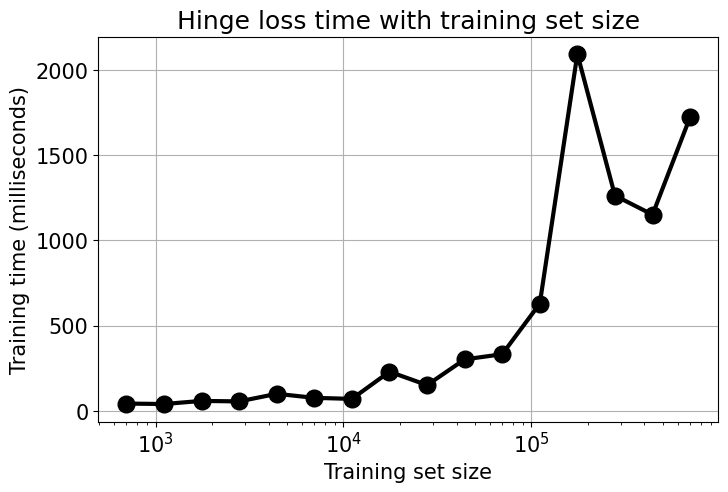

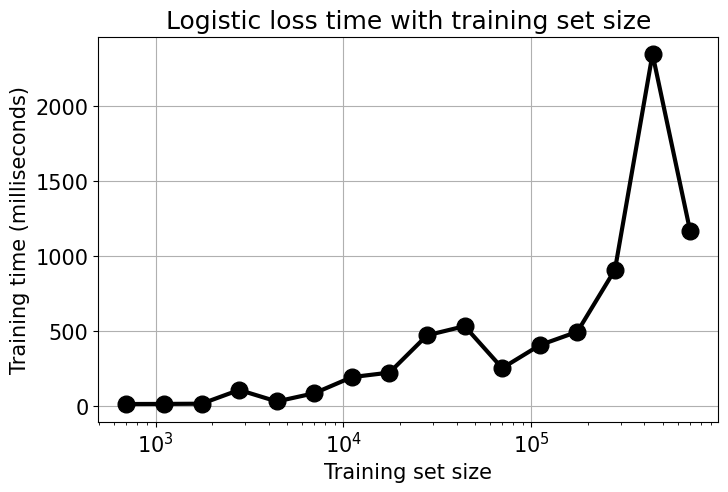

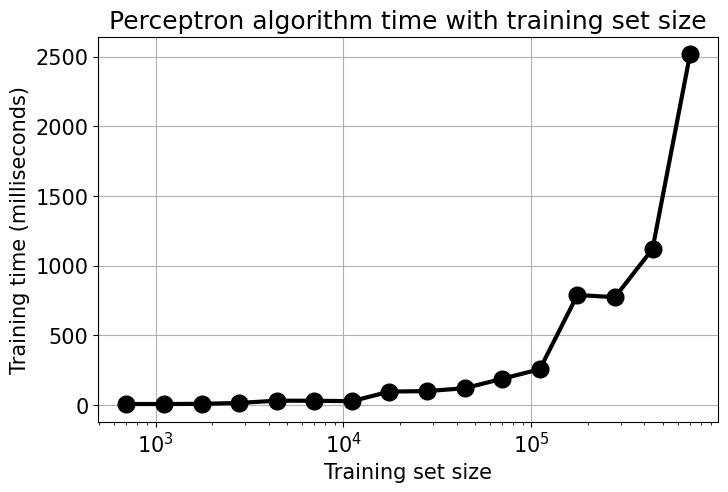

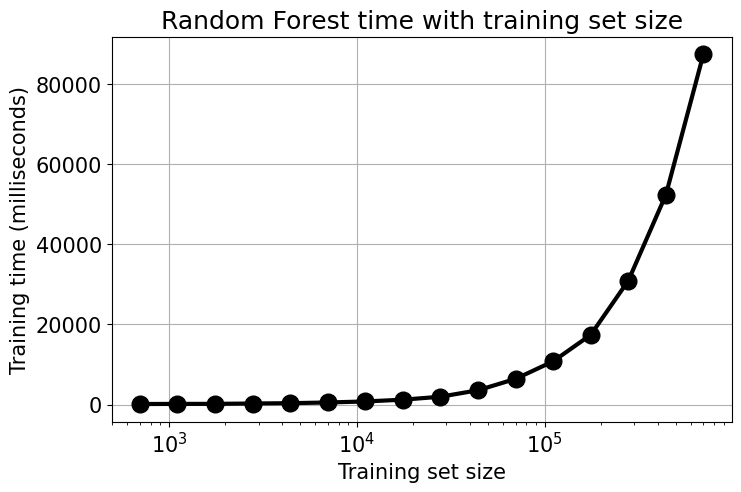

In [7]:
plot_var(hinge_time,'Hinge loss time')
plot_var(log_time,'Logistic loss time')
plot_var(perceptron_time,'Perceptron algorithm time')
plot_var(rf_time,'Random Forest time')
plt.show()

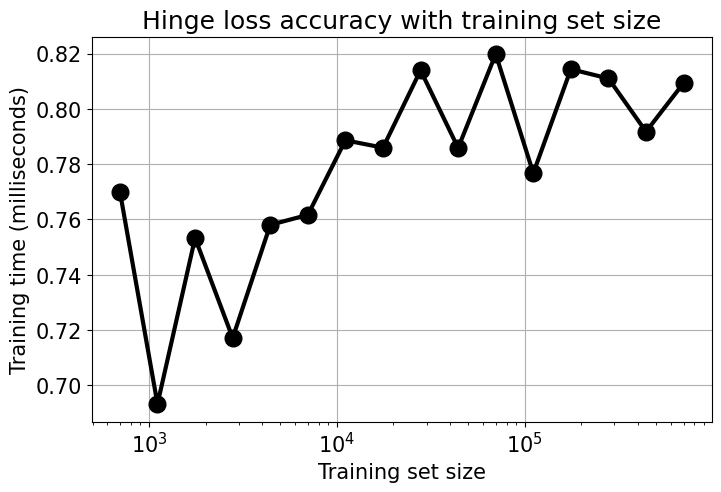

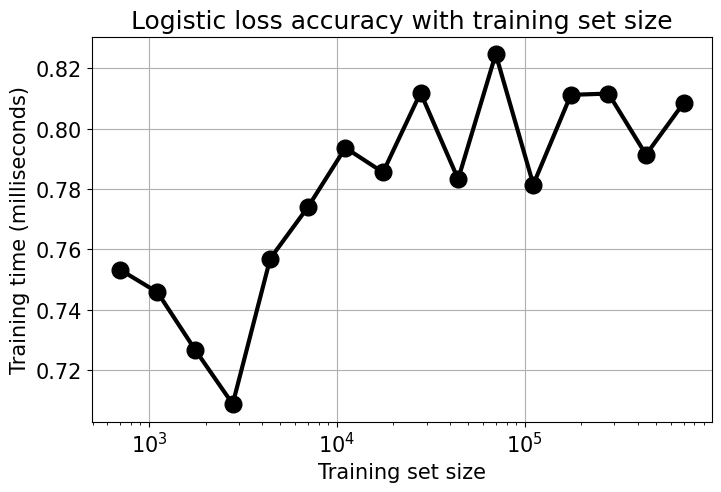

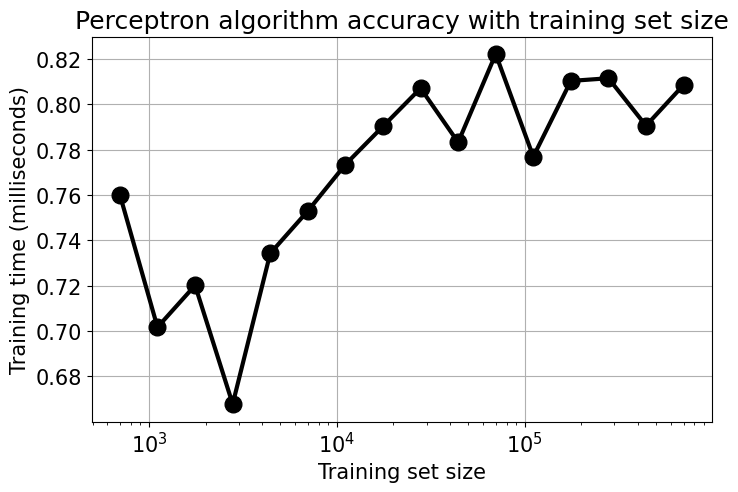

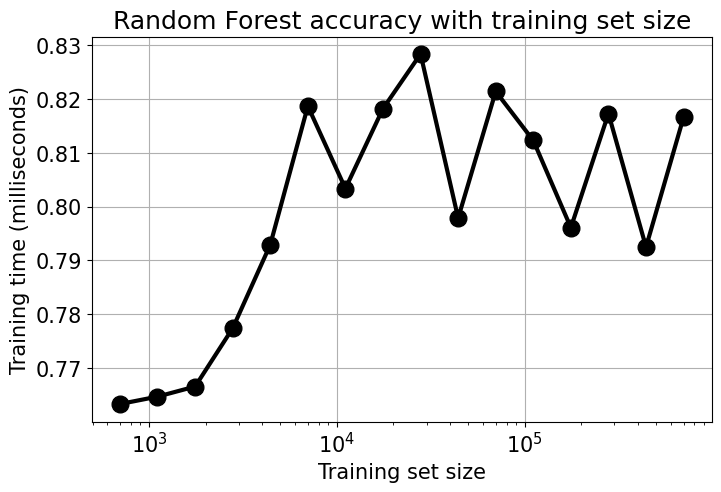

In [8]:
plot_var(hinge_acc,'Hinge loss accuracy')
plot_var(log_acc,'Logistic loss accuracy')
plot_var(perceptron_acc,'Perceptron algorithm accuracy')
plot_var(rf_acc,'Random Forest accuracy')
plt.show()

## Observation

While achieving similar accuracy level, the `SGDClassifier` estimator variants demonstrate faster training time as compared to the Random Forest classifier. The difference is not that significant at the low end of the training set size (< 100,000). But the difference becomes prominent for larger training set size.